In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append('/projects/trans_scratch/validations/workspace/szong/Cervical/notebook')
from lineticks import LineTicks

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

this script squash a regular plane plot and rotate it to a squashed v-shaped plane. squash points in 90 degree into specified angle by push points toward 45 degree line

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1.043200e-15,2q22.1,LRP1B,0.04368,LOC389033,14.981632,1.359717
1,1.519500e-09,2q36.3,AGXT,1.00000,NaN,8.818299,-0.000000
2,5.958900e-04,3p13,CHMP2B,1.00000,NaN,3.224834,-0.000000
3,1.144100e-02,3p14.2,MAP4,1.00000,NaN,1.941536,-0.000000
4,3.485300e-03,4q21.3,MAPK10,1.00000,NaN,2.457760,-0.000000


(0, 16)

(-8.0, 8.0)

xxx 10    0.500000
8     1.116734
7     1.394842
9     3.006704
14    3.086953
18    3.369964
6     3.809815
3     4.391307
15    5.053517
12    5.144581
4     5.939979
Name: hiv+q(-log10), dtype: float64


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:59: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:105: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:106: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:149: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:150: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Text(0.5,1,'del_cytoband_qvalue_comparison_hiv_pos_vs_neg')

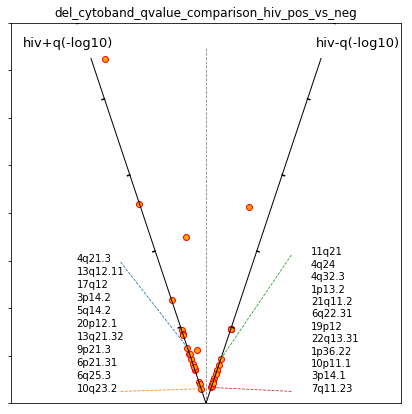

In [40]:
# constants
v_angle = 18
y_heigth = 16
tk_length = .1
squash_factor = v_angle/45.0
fig_heigth = 7

# gistic cytoband data
cnvdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
of = f'{cnvdir}del_cytoband_qvalue_comparison_hiv_pos_vs_neg.csv'
# ndf.to_csv(of, index=False)
ndf = pd.read_csv(of)
ndf.head()
x = ndf['hiv-q(-log10)']
y = ndf['hiv+q(-log10)']


# v plot setup
# sns.set_style('white')
f, ax = plt.subplots(figsize=(fig_heigth, fig_heigth))



point_dists = np.sqrt(x**2 + y**2)
angles_before = np.degrees(np.arcsin( y/point_dists))
angles_after = (90 - v_angle) + angles_before * squash_factor

# new coordinates in squashed and rotated plane
xc = point_dists*np.cos(np.radians(angles_after))
yc = point_dists*np.sin(np.radians(angles_after))

# plt.scatter(x, y)

# plot 45o angle line where both axes will be squashed toward
ax.vlines(0, 0, y_heigth-1, 'gray', linestyles='dashed', lw=.8)
plt.ylim(0, y_heigth)
plt.xlim(-y_heigth/2, y_heigth/2)
plt.scatter(xc, yc, c='orange', edgecolors='red')

# x axis
xlinexs = np.linspace(0, y_heigth, y_heigth) 
xlineys = xlinexs/np.tan(np.radians(v_angle))

# y axis
ylinexs = -np.linspace(0, y_heigth, y_heigth) 
# ylineys = xlinexs/np.tan(np.radians(90 + v_angle))

# figure out tick coordinates of tip and end
# xs, = ax.plot(xlinexs, xlineys, c='black', lw=1)
# ys, = ax.plot(ylinexs, xlineys, c='black', lw=1)
# y_heigth*np.tan(np.radians(v_angle))
axis_offset = 1.5
xs, = ax.plot((0, (y_heigth-axis_offset)*np.tan(np.radians(v_angle))), (0, y_heigth-axis_offset), c='black', lw=1)
ys, = ax.plot((0, -(y_heigth-axis_offset)*np.tan(np.radians(v_angle))), (0, y_heigth-axis_offset), c='black', lw=1)


# plot ticks
xax_length = y_heigth/np.cos(np.radians(v_angle))
tks = np.linspace(0, xax_length, int(y_heigth)/3+1)
xts1 = tks*np.cos(np.radians(90-v_angle))
yts1 = tks*np.sin(np.radians(90-v_angle))
xts2 = xts1 + tk_length*np.cos(np.radians(v_angle))
yts2 = yts1 - tk_length*np.sin(np.radians(v_angle))


# pot x and y axis ticks
_ = ax.plot((xts1, xts2), (yts1, yts2), color='black')
_ = ax.plot((-xts1, -xts2), (yts1, yts2), color='black')

# add text annotations
hivpos = ndf[(ndf['hiv-q(-log10)']==0)&(ndf['hiv+q(-log10)']<3)].sort_values('hiv+q(-log10)', ascending=True)
hivpos_bands = hivpos['cytoband'].tolist()
hivpos_qs = hivpos['hiv+q(-log10)']
# nbands = len(hivpos_bands)
# anno_ys = np.linspace(1, 10, nbands)
# anno_xs = np.array([-6]*nbands)
# for i, lb in enumerate(hivpos_bands):
#     _ = ax.text(anno_xs[i], anno_ys[i], lb)

# draw vertical line to annotate the low q values which are squished together, let labels spread evenly
mfactor = 3
xoffset =0.5
mhivpos_qs = hivpos_qs * mfactor
vl_min = min(mhivpos_qs)
vl_max = max(mhivpos_qs)
mhivpos_qs = mhivpos_qs - vl_min + xoffset
print('xxx', mhivpos_qs)
mhivpos_qs =  np.linspace(xoffset, vl_max- vl_min + xoffset, len(mhivpos_qs))
# get top and bottom annotation coordinates
top_anno = mhivpos_qs[mhivpos_qs.argmax()]
bottom_anno = mhivpos_qs[mhivpos_qs.argmin()]

anno_xs = np.array([-5.3]*len(hivpos_qs))
anno_ys = np.array(mhivpos_qs)
    
# ax.vlines(-5, 1, vl_max- vl_min + 1)
# ax.scatter([-5]*len(hivpos_qs), mhivpos_qs,  c='orange', edgecolors='red')
for i, lb in enumerate(hivpos_bands):
    _ = ax.text(anno_xs[i], anno_ys[i], lb)
 

# draw a line to connect annotations and points
dfpos = pd.DataFrame({'x':xc, 'y':yc})
df_sub = dfpos[(dfpos.x <0)&(dfpos.y<2.5)].sort_values('x')
top_point = df_sub.loc[df_sub.x.argmin(), :]
bottom_point = df_sub.loc[df_sub.x.argmax(),:]
plt.plot((-3.5,top_point[0]),(top_anno, top_point[1]), linestyle='--', lw=.8)
plt.plot((-3.5,bottom_point[0]),(bottom_anno, bottom_point[1]), linestyle='--', lw=.8)


hivneg = ndf[(ndf['hiv+q(-log10)']==0)&(ndf['hiv-q(-log10)']<3)].sort_values('hiv-q(-log10)', ascending=True)    
hivneg_bands = hivneg['cytoband'].tolist()
hivneg_qs = hivneg['hiv-q(-log10)']
# nbands = len(hivneg_bands)
# anno_ys = np.linspace(1, 10, nbands)
# anno_xs = np.array([4]*nbands)
# for i, lb in enumerate(hivneg_bands):
#     _ = ax.text(anno_xs[i], anno_ys[i], lb)
    
# draw dottedline to annotations
# ax.plot(())
# print(anno_xs, anno_ys)
# xc
# yc

# draw vertical line
# mfactor = 5
# xoffset = 1
mhivneg_qs = hivneg_qs * mfactor
vl_min = min(mhivneg_qs)
vl_max = max(mhivneg_qs)
mhivneg_qs = mhivneg_qs - vl_min + 1
mhivneg_qs =  np.linspace(xoffset, vl_max- vl_min + xoffset+2, len(mhivneg_qs))
# get top and bottom annotation coordinates
top_anno = mhivneg_qs[mhivneg_qs.argmax()]
bottom_anno = mhivneg_qs[mhivneg_qs.argmin()] 
anno_xs = np.array([4.3]*len(hivneg_qs))
anno_ys = np.array(mhivneg_qs)
  
# ax.vlines(5, 1, vl_max- vl_min + 1)
# ax.scatter([5]*len(hivneg_qs), mhivneg_qs,  c='orange', edgecolors='red')
for i, lb in enumerate(hivneg_bands):
    _ = ax.text(anno_xs[i], anno_ys[i], lb)

    
# draw a line to connect annotations and points
dfneg = pd.DataFrame({'x':xc, 'y':yc})
df_sub = dfneg[(dfneg.x >0)&(dfneg.y<2.5)].sort_values('x')
top_point = df_sub.loc[df_sub.x.argmax(), :]
bottom_point = df_sub.loc[df_sub.x.argmin(),:]
plt.plot((3.5,top_point[0]),(top_anno, top_point[1]), linestyle='--', lw=.8)
plt.plot((3.5,bottom_point[0]),(bottom_anno, bottom_point[1]), linestyle='--', lw=.8)
    

# x y axis lables
_ = ax.text(4.5, 15, 'hiv-q(-log10)', fontsize=13)
_ = ax.text(-7.5, 15, 'hiv+q(-log10)', fontsize=13)


ax.set_title('del_cytoband_qvalue_comparison_hiv_pos_vs_neg')

# # remove ticks and ticklabels
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off

of = f'{cnvdir}del_cytoband_qvalue_comparison_hiv_pos_vs_neg_vplot.png'
plt.savefig(of, bbox_inches='tight', dpi=200)
plt.show()

In [13]:
# yc[yc <1.3]
dfpos = pd.DataFrame({'x':xc, 'y':yc})
df_sub = dfpos[(dfpos.x <0)&(dfpos.y<2.5)].sort_values('x')
left_point = df_sub.loc[df_sub.x.argmax(), :]
right_point = df_sub.loc[df_sub.x.argmin(),:]
df_sub

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


x   -0.199141
y    0.612893
Name: 10, dtype: float64

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """


x   -0.759490
y    2.337469
Name: 4, dtype: float64

,x,y
4,-0.759490,2.337469
12,-0.677559,2.085313
15,-0.668179,2.056444
3,-0.599968,1.846510
6,-0.540071,1.662167
18,-0.494763,1.522725
14,-0.465612,1.433005
9,-0.457346,1.407565
16,-0.369040,2.259058
7,-0.291315,0.896575


In [4]:
ndf[ndf['hiv+q(-log10)']==0].sort_values('hiv-q(-log10)', ascending=True)

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
28,1.0,7q11.23,NaN,0.199190,FLJ35390,-0.0,0.700732
23,1.0,3p14.1,NaN,0.170100,PXK,-0.0,0.769296
29,1.0,10p11.1,NaN,0.170100,ZNF33B,-0.0,0.769296
21,1.0,1p36.22,NaN,0.141170,PRKCZ,-0.0,0.850258
35,1.0,22q13.31,NaN,0.132270,DNAJB7,-0.0,0.878539
33,1.0,19p12,NaN,0.108150,EPHX3,-0.0,0.965973
27,1.0,6q22.31,NaN,0.076578,C6orf170,-0.0,1.115896
34,1.0,21q11.2,NaN,0.048570,TPTE,-0.0,1.313632
20,1.0,1p13.2,NaN,0.036117,MAGI3,-0.0,1.442288
26,1.0,4q32.3,NaN,0.034063,GUCY1A3,-0.0,1.467717


In [6]:
ndf[ndf['hiv-q(-log10)']==0].sort_values('hiv+q(-log10)', ascending=False)

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
1,1.519500e-09,2q36.3,AGXT,1.0,NaN,8.818299,-0.0
5,2.792400e-05,4q35.2,F11,1.0,NaN,4.554022,-0.0
2,5.958900e-04,3p13,CHMP2B,1.0,NaN,3.224834,-0.0
11,8.401800e-04,11q24.3,TTC36,1.0,NaN,3.075628,-0.0
13,9.411400e-04,13q14.2,LOC100616668,1.0,NaN,3.026346,-0.0
4,3.485300e-03,4q21.3,MAPK10,1.0,NaN,2.457760,-0.0
12,6.417600e-03,13q12.11,LOC100616668,1.0,NaN,2.192627,-0.0
15,6.882200e-03,17q12,BRIP1,1.0,NaN,2.162273,-0.0
3,1.144100e-02,3p14.2,MAP4,1.0,NaN,1.941536,-0.0
6,1.787700e-02,5q14.2,ATP6AP1L,1.0,NaN,1.747705,-0.0


Text(4,1,'2q36.3')

Text(4,1.6,'4q35.2')

Text(4,2.2,'3p13')

Text(4,2.8,'11q24.3')

Text(4,3.4,'13q14.2')

Text(4,4,'4q21.3')

Text(4,4.6,'13q12.11')

Text(4,5.2,'17q12')

Text(4,5.8,'3p14.2')

Text(4,6.4,'5q14.2')

Text(4,7,'20p12.1')

Text(4,7.6,'13q21.32')

Text(4,8.2,'9p21.3')

Text(4,8.8,'6p21.31')

Text(4,9.4,'6q25.3')

Text(4,10,'10q23.2')

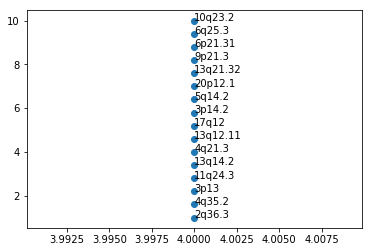

In [7]:
fig, ax = plt.subplots()
hivneg_bands = ndf[ndf['hiv-q(-log10)']==0].sort_values('hiv+q(-log10)', ascending=False)['cytoband'].tolist()
nbands = len(hivneg_bands)
anno_ys = np.linspace(1, 10, nbands)
anno_xs = np.array([4]*nbands)
for i, lb in enumerate(hivneg_bands):
    ax.text(anno_xs[i], anno_ys[i], lb)
ax.scatter(anno_xs, anno_ys)
plt.show()

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1.043200e-15,2q22.1,LRP1B,0.04368,LOC389033,14.981632,1.359717
1,1.519500e-09,2q36.3,AGXT,1.00000,NaN,8.818299,-0.000000
2,5.958900e-04,3p13,CHMP2B,1.00000,NaN,3.224834,-0.000000
3,1.144100e-02,3p14.2,MAP4,1.00000,NaN,1.941536,-0.000000
4,3.485300e-03,4q21.3,MAPK10,1.00000,NaN,2.457760,-0.000000


Text(0.5,0,'HIV-(-log10)')

Text(0,0.5,'HIV+(-log10)')

Text(0.5,1,'GISTIC dels cytobands')

(-1, 16)

(-1, 16)

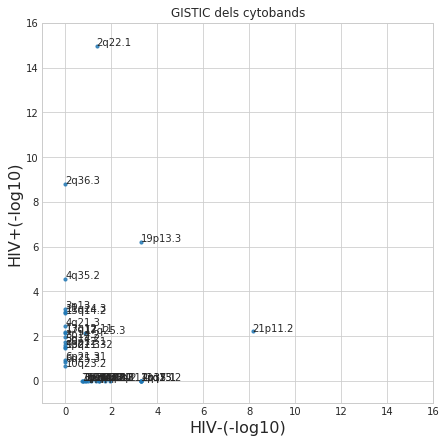

In [8]:
cnvdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
of = f'{cnvdir}gistic_cytobands_hiv_pos_vs_neg.csv'
# ndf.to_csv(of, index=False)
ndf = pd.read_csv(of)
ndf.head()
x = ndf['hiv-q(-log10)']
y = ndf['hiv+q(-log10)']
# Set theme
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(x='hiv-q(-log10)', y='hiv+q(-log10)', data=ndf, ax=ax, fit_reg=False,  scatter_kws={"s": 10})#x_jitter=1e-12, y_jitter=1e-10,
ax.set_xlabel('HIV-(-log10)', fontsize=16)
ax.set_ylabel('HIV+(-log10)', fontsize=16)
ax.set_title('GISTIC dels cytobands')
ax.set_xlim(-1, 16)
ax.set_ylim(-1, 16)

texts = [plt.text(a, b, c) for a, b, c in zip(ndf['hiv-q(-log10)'], ndf['hiv+q(-log10)'], ndf.cytoband)]
# adjust_text(texts)

# of = f'{root}del_cytoband_qvalue_comparison_hiv_pos_vs_neg.png'
# plt.savefig(of, bbox_inches='tight', dpi=200)

In [65]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])